🌳🌳**BIRZEIT UNIVERSITY**🌳🌳


> **Electrical and Computer Engineering Department**


> **Machine Learning and Data Science ‐ ENCS5341**






**Assignment #1**

> **Name** : Shereen Ibdah

> **ID** : 1200373


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

The necessary libraries have been imported. Each library serves a specific purpose within the Python ecosystem for data analysis, visualization, statistical analysis, and numerical computation.



In [ ]:
df = pd.read_csv('/content/cars.csv')
#count the number of features
print("The number of features in the dataset is : ",len(df.columns))
#count the number of examples
print("The number of examples in the dataset is : ",len(df.index))

The number of features in the dataset is :  8
The number of examples in the dataset is :  398


**1**- The code reads the 'cars.csv' file using pd.read_csv() and stores it as a DataFrame named df.
> ▶ Subsequently, len(df.columns) determines the count of columns (features) within the DataFrame.

> ▶ while len(df.index) counts the number of rows (examples) present in the DataFrame.





In [38]:
#2-are there feature with missing values?
print("is there missing values :" ,df.isnull().values.any())
#how many null values in each feature?
print("The number of null values in each feature is : \n",df.isnull().sum())

is there missing values : False
The number of null values in each feature is : 
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


> **2-** The dataset in df is checked for missing values, which is a fundamental step in Data Cleaning during data preprocessing.

> ▶ The method df.isnull().values.any() returns True if any missing values exist within the DataFrame (df), and False if there are none.

> ▶ Meanwhile, df.isnull().sum() is employed to identify the count of null (missing) values in each feature (column) of the DataFrame.





In [39]:
#3-Fill the missing values in each feature using a proper imputation method
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)
print("median of horsepower : ",df['horsepower'].median())
print("mode of origin : ",df['origin'].mode()[0])
print("The number of null values in each feature after filling is :\n",df.isnull().sum())

median of horsepower :  93.5
mode of origin :  USA
The number of null values in each feature after filling is :
 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


**3-** In the data preprocessing phase (Data Cleanning), missing values within the dataset are handled by replacing them with the most probable value.
>▶ For numeric feature data types, the missing values are filled using the median of the data in that specific feature. This choice of using the median aims to minimize the impact of outliers compared to using the mean.


>▶ Conversely, for non-numeric data, the missing values are filled using the mode, which represents the most frequent or probable value for that particular feature.
In the given database the mode for the origin is "USA" and the median for the hoursepower is 93.5 .


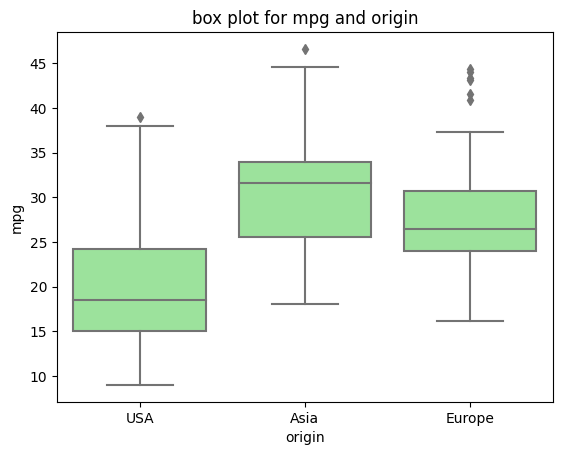

the country produces cars with better fuel economy  Asia


In [ ]:
#4- Which country produces cars with better fuel economy?
sns.boxplot(x="origin", y="mpg", data=df , color='lightgreen')
plt.title('box plot for mpg and origin')
plt.show()
print("the country produces cars with better fuel economy ",df.groupby('origin')['mpg'].median().idxmax())


>4-is a common type of data visualization used to display
the distribution of 'mpg' (miles per gallon) for each country in the 'origin' category. It effectively represents key statistical metrics such as :

*   Actual minimum and maximum values
*   The first (Q1) and third (Q3) quartiles of the data
*   The median of the data
*   The Upper Whisker Limit and The Lower Whisker Limit
*   outliers

>From the boxplot, it's evident that cars produced in **Asia** exhibit **better** fuel economy compared to other regions, showcasing the largest median and higher mpg values.



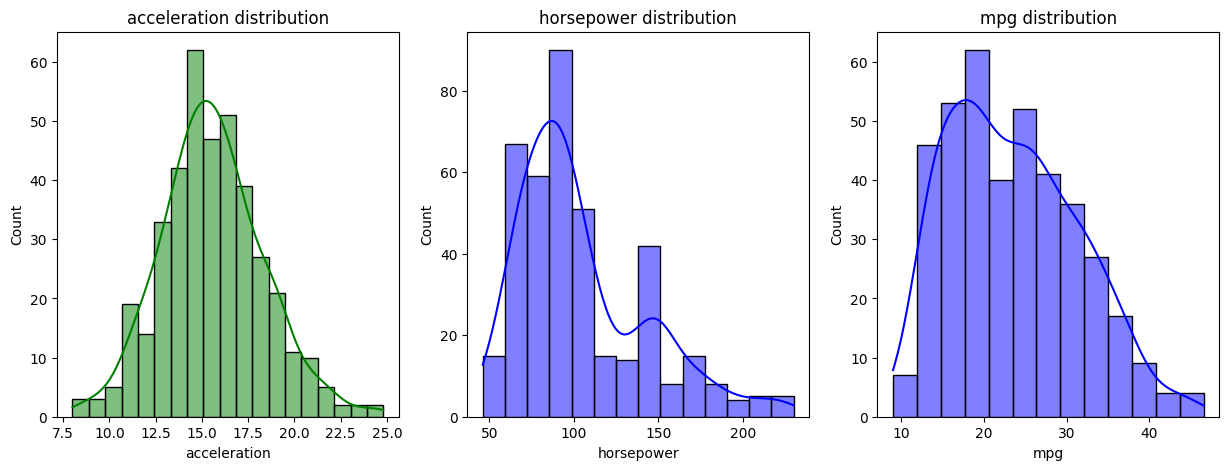

the most similar to a Gaussian is : 'acceleration'


In [ ]:
#5-Which of the following features has a distribution that is most similar to a  Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(ax=axes[0], data=df['acceleration'], kde=True, color='green')
axes[0].set_title('acceleration distribution')
sns.histplot(ax=axes[1], data=df['horsepower'], kde=True, color='blue')
axes[1].set_title('horsepower distribution')
sns.histplot(ax=axes[2], data=df['mpg'], kde=True, color='blue')
axes[2].set_title('mpg distribution')
plt.show()
print("the most similar to a Gaussian is : 'acceleration'")


> **5-** Another method of data visualization involves using histograms to display the distribution of acceleration, horsepower, and mpg.
These metrics are divided into bins, with the frequency of occurrences represented on the Y-axis for each bin range. Observing the figures, it's notable that the distribution of **acceleration** closely resembles a Gaussian (normal) distribution, as it appears **symmetric** without any noticeable skewness


In [37]:
#6-check for Gaussian distribution using quantitate method
print("skewness for acceleration : ",df['acceleration'].skew())
print("skewness for horsepower : ",df['horsepower'].skew())
print("skewness for mpg : ",df['mpg'].skew())
skew = min(df['acceleration'].skew(),df['horsepower'].skew(),df['mpg'].skew())
if skew == df['acceleration'].skew():
    print("the most similar to a Gaussian is : 'acceleration'")
elif skew == df['horsepower'].skew():
    print("the most similar to a Gaussian is : 'horsepower'")
else:
    print("the most similar to a Gaussian is : 'mpg'")

skewness for acceleration :  0.27877684462588986
skewness for horsepower :  1.1062242930872614
skewness for mpg :  0.45706634399491913
the most similar to a Gaussian is : 'acceleration'



> **6-** Skewness is a statistical measure of a distribution's symmetry. A value closer to zero suggests a more symmetric distribution resembling a Gaussian distribution. It also indicates the data's tendency to cluster towards one side of the distribution.

> Among these attributes, '**acceleration**' demonstrated the closest resemblance to a Gaussian distribution, indicated by its skewness value closest to zero. This proximity to zero signifies a higher level of symmetry in the distribution, aligning more closely with the characteristics of a Gaussian (normal) distribution compared to the other attributes.











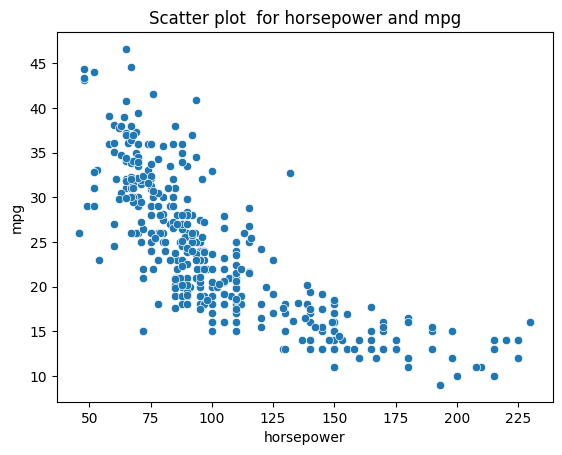

the value of correlation between horsepower and mpg is :  -0.7734532045742156
there is a negative correlation between horsepower and mpg


In [ ]:
#7- Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the y-axis
sns.scatterplot(x="horsepower", y="mpg", data=df)
plt.title('Scatter plot  for horsepower and mpg')
plt.show()
print("the value of correlation between horsepower and mpg is : ",df['horsepower'].corr(df['mpg']))
if df['horsepower'].corr(df['mpg']) > 0 and df['horsepower'].corr(df['mpg']) < 0.4:
    print("there is a weak correlation between horsepower and mpg")
elif df['horsepower'].corr(df['mpg']) < 0 and df['horsepower'].corr(df['mpg']) > -0.4:
    print("there is no  correlation between horsepower and mpg")
else :
    # check for correlation Type
    if df['horsepower'].corr(df['mpg']) > 0:
        print("there is a positive correlation between horsepower and mpg")
    else:
        print("there is a negative correlation between horsepower and mpg")



> **7-**The correlation between horsepower and mpg can been idintified from the scatter plot for both (horsepower on the x-axis) and (mpg on the y-axis) hence  if one  increase(decrease), then other will decrease(increase) there is a negaitive corrletaion between them.

> The correlation has been calcuated using df['horsepower'].corr(df['mpg']) method, the value returned indictaes if there is a correlation between them or not , if the value between [0 ➡ 0.4] or [0 ➡ -0.4] ther  are no correlation but for our data the  value of the correlation is -0.7734 which idicates  that there are **Stong Negative Correlation bretween them.**



w0 =  40.01131787111278
w1 =  -0.15816020313402746


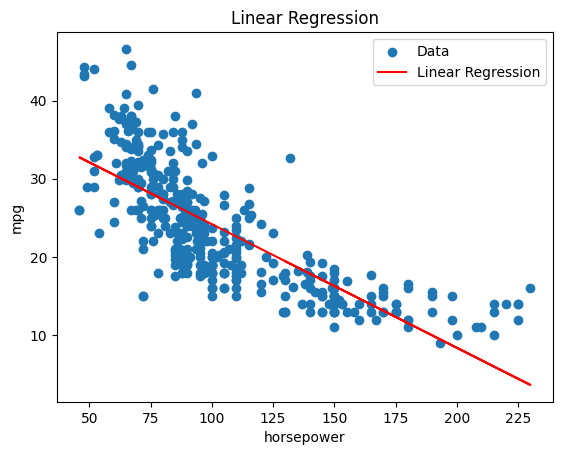

In [20]:
#Implement the closed form solution of linear regression and use it to learn a linear model to predict the ‘mpg’ from the ‘horsepower’.
def closeFormRegression(X, y):
    # Add a column of ones for the intercept term
    newX = np.c_[np.ones((len(X), 1)), X]
    # Find the best parameters theta
    theta_best = np.linalg.inv(newX.T.dot(newX)).dot(newX.T).dot(y)
    w0 = theta_best[0][0]
    w1 = theta_best[1][0]
    print("w0 = ", w0)
    print("w1 = ", w1)
    plt.scatter(X, y, label='Data')
    plt.title('Linear Regression')
    plt.plot(X, w0 + w1 * X, "r", label='Linear Regression')
    plt.xlabel("horsepower")
    plt.ylabel("mpg")
    plt.legend()
    plt.show()
X = df['horsepower'].values.reshape(-1, 1)  # Feature
y = df['mpg'].values.reshape(-1, 1)        # Target
closeFormRegression(X, y)

>**8-** In **closed-form linear regression**, the aim is to establish a relationship between the 'horsepower' feature and the 'mpg' target variable while also identifying the intercept (w0) and the slope (w1) in thence to predict the future example. This process involves computing the parameter vector 'w' using the equation w = (XT*X)^-1*XT*y , where 'w' encapsulates both the intercept (w0) and the slope (w1) within a two-dimensional space and
f(x) = w0x0 + w1x1 .

> Subsequent to the derivation of these parameters, a line is plotted to symbolize the learned relationship between 'horsepower' and 'mpg.' **The slope of this line represents w1**, **and the y-intercept corresponds to w0**.


> Our computations yielded the values w0 = 40.0113178 and w1 = -0.1581602. These values indicate that the plotted line exhibits a negative slope confirming a descending trend, as visually observed in the plot. Additionally, the approximate y-intercept is around 40, so f(x) = 40.0113178x0 + -0.1571602x1.




w0 =  56.781208160381205
w1 =  -0.46256337916236057
w2 =  0.0012143177257604933


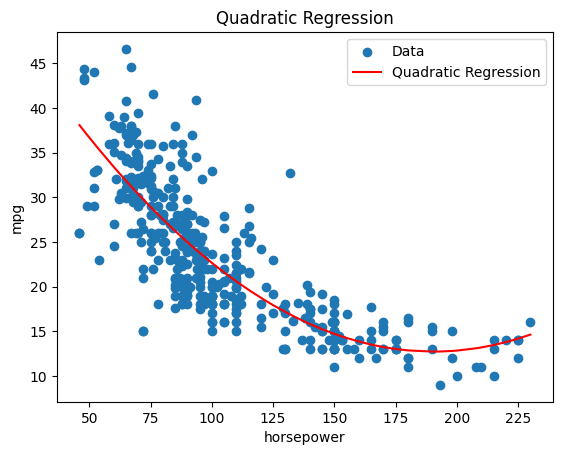

In [22]:
#9Repeat part 8 but now learn a quadratic function of the form f = w0 + w1x + w2x^2
2
def quadratic_regression(X, y):
    #sort both lists
    X, y = zip(*sorted(zip(X, y)))
    X = np.array(X)
    y = np.array(y)
    # Add a column of ones for the intercept term
    newX = np.c_[np.ones((len(X), 1)), X, X ** 2]
    # Find the best parameters theta
    theta_best = np.linalg.inv(newX.T.dot(newX)).dot(newX.T).dot(y)
    w0 = theta_best[0][0]
    w1 = theta_best[1][0]
    w2 = theta_best[2][0]
    print("w0 = ", w0)
    print("w1 = ", w1)
    print("w2 = ", w2)
    plt.scatter(X, y, label='Data')
    plt.title('Quadratic Regression')
    plt.plot(X, w0 + w1 * X + w2 * X ** 2, "r", label='Quadratic Regression')
    plt.xlabel("horsepower")
    plt.ylabel("mpg")
    plt.legend()
    plt.show()

X = df['horsepower'].values.reshape(-1, 1)  # Feature
y = df['mpg'].values.reshape(-1, 1)        # Target
quadratic_regression(X, y)


> **9-**The function **'quadratic_regression'** was implemented to conduct quadratic regression analysis between the 'horsepower' feature and the 'mpg' target variable from a given dataset

> The learning of the quadratic function took place via linear regression.
This entailed the addition of new features, forming the 'newX' data matrix comprising (1, X, X^2) features. The function f(x) was then determined using the inner product between 'newX' and the parameter vector 'w', expressed as
**f(x) = w0+w1x+w2x^2** The parameter vector 'w=(w0,w1,w2)' was computed using the formula w = (newXT * newX)^-1 * newXT * y, utilizing linear algebra techniques to derive the optimal parameters for the quadratic function within the linear regression framework."


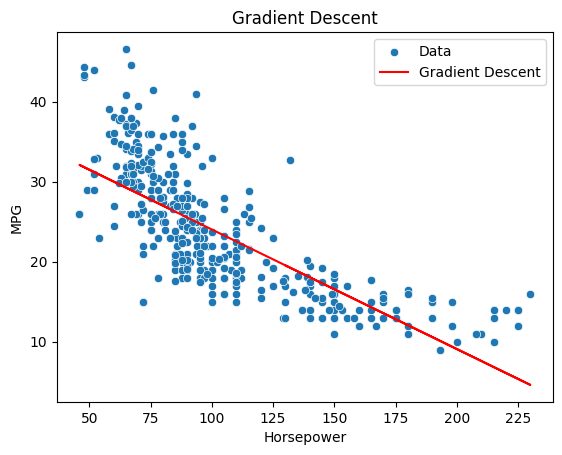

Learned Parameters (w0, w1): [-35.09253895  -8.71589259]


In [35]:
#gradient descent
def gradient_descent(X, alpha, iterations):
    # Initialize parameters
    # Target variable
    Y = df['mpg'].values
    w = np.zeros(2)

    # Gradient Descent
    for _ in range(iterations):
        # Calculate predictions\
        predictions = np.dot(X_normalized, w)
       # predictions = X_normalized @ w

        # Calculate errors
        errors = predictions - Y

        # Update parameters
        w -= alpha * (1 / len(Y)) *  np.dot(X_normalized.T,errors)
    return w

alpha = 0.005
iterations = 4000
# Features
X = np.column_stack((np.ones(len(df)), df['horsepower']))
# Calculate mean and standard deviation for normalization
mean_horsepower = np.mean(X)
std_horsepower = np.std(X)
# Apply Z-score normalization
X_normalized = (X - mean_horsepower) / std_horsepower
# Learning rate and number of iterations
w = gradient_descent(X_normalized, alpha, iterations)
sns.scatterplot(x='horsepower', y='mpg', data=df, label='Data')
# Plot the learned line
plt.plot(df['horsepower'],np.dot(X_normalized,w), color='red', label='Gradient Descent')
plt.title('Gradient Descent')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.show()
# Print the learned parameters
print('Learned Parameters (w0, w1):', w)

> **10-**The **gradient descent algorithm** was implemented for simple linear regression to predict 'mpg' (miles per gallon) based on the 'horsepower' feature within the dataset.'

> The process began with data preparation, where the 'horsepower' values were normalized using Z-score normalization after stacking them with a column of ones to account for the intercept.

> The algorithm utilized an iterative approach, updating the model's weights over a specified number of iterations. During each iteration, predictions were made, errors calculated, and the weights adjusted using the gradient descent technique.

> The scatter plot visualized the 'horsepower' against 'mpg,' showcasing the learned line derived from the gradient descent algorithm. The resultant line represented the learned relationship between 'horsepower' and 'mpg,' providing insights into their predictive association. Ultimately, the algorithm produced learned parameters ('w0', 'w1'), offering an **optimized linear model** for predicting 'mpg' based on 'horsepower.


  

**The End 💐**